# Encontrar nÃºmero de clusters Ã³ptimo

En este notebook se os indicarÃ¡n los pasos a seguir para encontrar el nÃºmero de clÃºsters Ã³ptimo segÃºn el mÃ©todo de la silueta. Primero os pongo un ejemplo sencillo y luego encontrarÃ©is un ejercicio que tenÃ©is que resolver durante la sesiÃ³n de laboratorio (o en casa). Este ejercicio no lo voy a evaluar, la idea es que lo resolvÃ¡is vosotros mismos, podÃ©is comparar resultados con compaÃ±eros. Si tenÃ©is alguna duda, por supuesto, me preguntÃ¡is.

## 0. Importaciones varias necesarias

In [36]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.datasets import load_digits, load_iris
from sklearn.metrics import silhouette_score, calinski_harabaz_score

## 1. Silueta como mecanismo para evaluar un resultado de clustering

En este trozo de cÃ³digo se ejecuta KMeans sobre los datos de iris con dos "k" diferentes, a elegir por el usuario, y se calcula el valor de la silueta (mÃ©todo de evaluaciÃ³n de clusters) para cada k escogida. Para obtener informaciÃ³n sobre lo que es la silueta, podÃ©is leer la pÃ¡gina de wikipedia https://en.wikipedia.org/wiki/Silhouette_(clustering) o directamente el artÃ­culo que la introdujo: https://doi.org/10.1016/0377-0427(87)90125-7

In [37]:
# load iris data
iris = load_iris()

# select 2 values for numbers of clusters to compare
nc1, nc2 = 3, 4

kmeans1 = KMeans(n_clusters = nc1)
kmeans1.fit(iris.data)
score1 = silhouette_score(iris.data, kmeans1.labels_)
kmeans2 = KMeans(n_clusters = nc2)
kmeans2.fit(iris.data)
score2 = silhouette_score(iris.data, kmeans2.labels_)
print("silhouette score for {} clusters: {:.4f}; silhouette score for {} clusters: {:.4f}".format(nc1, score1, nc2, score2))
if score1 > score2:
    print("{} clusters are a better option for this dataset".format(nc1))
else:
    print("{} clusters are a better option for this dataset".format(nc2))


silhouette score for 3 clusters: 0.5528; silhouette score for 4 clusters: 0.4981
3 clusters are a better option for this dataset


## 2. Lo que tienes que hacer

Utiliza el algoritmo de clustering que prefieras para hacer un clustering sobre los datos "digits" que puedes obtener con la funciÃ³n `load_digits` de `scikit-learn`. Estos datos son una colecciÃ³n de 1797 imÃ¡genes de 8x8 = 64 pÃ­xeles que representan dÃ­gitos del 0 al 9. Son datos etiquetados con el nÃºmero de la imagen. Cada observaciÃ³n (ejemplo) consta por lo tanto de 64 atributos. Lo que tienes que hacer es:
1. Escoge un algoritmo de clustering que te guste
2. Optimiza el nÃºmero de clusters sobre este dataset; para ello utiliza una medida como la silueta u otras (una alternativa popular es el Ã­ndice Calinski-Harabaz, por ejemplo)
3. Calcula de alguna forma que se te ocurra (cuantitativa) la capacidad de tu clustering para separar en clusters los diferentes dÃ­gitos (del 0 al 9) que representan las imÃ¡genes.
4. Haz un plot de los dÃ­gitos con el clustering Ã³ptimo que hayas encontrado. Para hacer la visualizaciÃ³n, utiliza PCA o t-SNE para reducir de 64 a 2 dimensiones.

<Figure size 432x288 with 0 Axes>

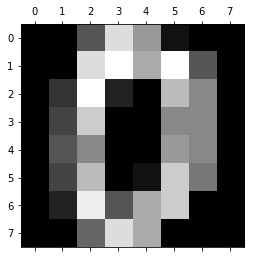

In [38]:
%matplotlib inline
digits = load_digits()
plt.gray()
plt.matshow(digits.images[0])
X = digits.data
y = digits.target

In [39]:
X.shape

(1797, 64)

In [40]:
y.shape

(1797,)